## Problem Defination

Buyers spend a significant amount of time surfing an e-commerce store, since the pandemic the e-commerce has seen a boom in the number of users across the domains. In the meantime, the store owners are also planning to attract customers using various algorithms to leverage customer behavior patterns.

In this competition provided the visitor's session data, we are challenging the Machinehack community to come up with a regression algorithm to predict the time a buyer will spend on the platform.

## Data Dictionary
    session_id - Unique identifier for every row
    session_number - Session type identifier
    client_agent - Client-side software details
    device_details -  Client-side device details
    date - Datestamp of the session
    purchased - Binary value for any purchase done
    added_in_cart - Binary value for cart activity
    checked_out -  Binary value for checking out successfully
    time_spent - Total time spent in seconds (Target Column)

## Evaluation Metrics
The submission will be evaluated using the RMSLE metric. One can use `np.sqrt(mean_squared_log_error(actual, predicted))` to calculate the same

## Steps Followed:-
   1. As its is a Time Series problem, so importing the data into `parse_dates` format so that the date column is imported as Pandas DateTime Object, instead of regular object. 
   2. Plotting histogram of the `time_spent` column to understand the target data curve.
   3. Plotting the `time spent` v/s the `date` column to understand the on which months the time_spent was more.
   4. Creating Year, month, date column seperately from date column. And finally deleteing the dae column as we have extracted all the required information from the date column in the form of Year, Months and Date. using `convert_Date_Obj(df)` function....
   5. Checking for the String values in the Data Frame and creating a Pandas categorical instead.. using `convert_string_to_categorical(df)`
   6. There is no Numerical field with missing values.
   7. Find the Categorical fileds having missing values ==> Fill them and convert them to numbers.... using `convert_string_to_categorical(df)`
   8. Spliting the Data into Training and Validation dataset using `train_test_split`
   9. Creating the custom Scoreing function... In this case RMSLE and calling it using `show_scores(model)`
   10. Selecting an Algorithm and training it by the `fit()` function.
   11. Predicting on the Valiadtion data using `model.predict()` function, and scoring it.
   12. Comapring the scores of various models
       a. **random_forest_score**
       b. **svr_rbf_score**
   
   
### KNOWLEDGE Learnt:
* **Hyperparameters for Random Forest Regressor:**

    1. n_estimators = number of trees in the foreset
    2. max_features = max number of features considered for splitting a node
    3. max_depth = max number of levels in each decision tree
    4. min_samples_split = min number of data points placed in a node before the node is split
    5. min_samples_leaf = min number of data points allowed in a leaf node
    6. bootstrap = method for sampling data points (with or without replacement)
    
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
#converted the date to datetime instead of only being object
df = pd.read_csv("Data\Train.csv",
                parse_dates=["date"])
df.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


In [3]:
dups=df.duplicated()
print(dups.any())

False


In [4]:
len(df)

5429

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   session_id      5429 non-null   object        
 1   session_number  5429 non-null   int64         
 2   client_agent    5269 non-null   object        
 3   device_details  5429 non-null   object        
 4   date            5429 non-null   datetime64[ns]
 5   purchased       5429 non-null   int64         
 6   added_in_cart   5429 non-null   int64         
 7   checked_out     5429 non-null   int64         
 8   time_spent      5429 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 381.9+ KB


<AxesSubplot:>

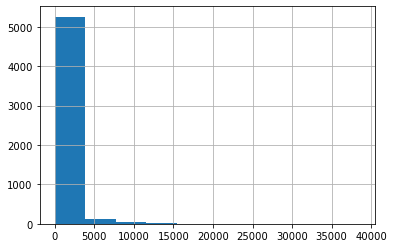

In [6]:
df["time_spent"].hist()

<AxesSubplot:>

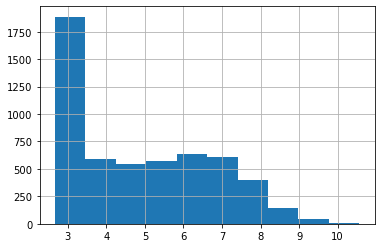

In [7]:
df["log_time_spent"] = np.log(df["time_spent"])
df["log_time_spent"].hist()

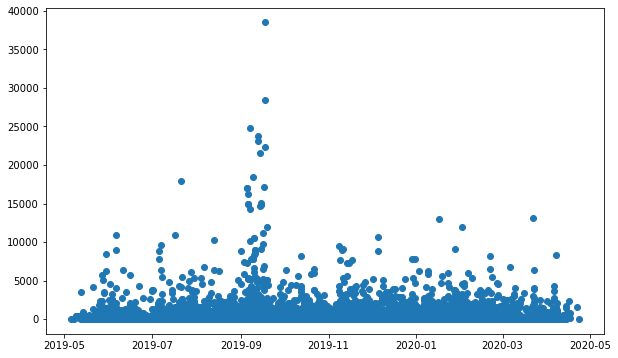

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["date"], df["time_spent"])

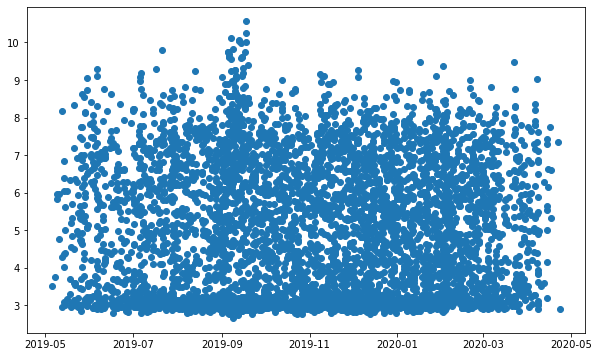

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df["date"], df["log_time_spent"])

In [10]:
np.log(33.317), np.exp(3.506068), np.log2(33.317), np.exp2(5.058186595231395)

(3.506067777230751, 33.3170074220039, 5.058186595231395, 33.31699999999999)

In [11]:
df["date"].min(), df.date.max()

(Timestamp('2019-05-06 00:00:00'), Timestamp('2020-04-23 00:00:00'))

<AxesSubplot:>

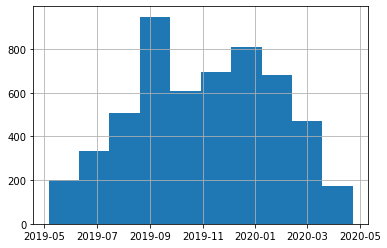

In [12]:
df.date.hist()

sorting the dataframe on the date:-


In [13]:
# We will not sort it by date as even the test data also have all mix lot of dates
#df.sort_values(by=["date"], inplace=True, ascending=True)
#df.head()

In [14]:
def convert_Date_Obj(df):
    """
    Accecps a Data Frame and a date object and extracts its corresponding Year Month and Date
    """
    
    df["Year"] = df.date.dt.year
    df["Month"] = df.date.dt.month
    df["Date"] = df.date.dt.day
    df["Day_of_Year"] = df.date.dt.dayofyear
    df["Week_Of_Year"] = df.date.dt.weekofyear
    df["Quarter"] = df.date.dt.quarter
    df["Day_Of_Week"] = df.date.dt.dayofweek
    df.drop("date", axis=1, inplace=True)
    
    return df

In [15]:
df_new = convert_Date_Obj(df)
df_new.head()


<ipython-input-14-d1471cc7cbcb>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["Week_Of_Year"] = df.date.dt.weekofyear


,session_id,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,time_spent,log_time_spent,Year,Month,Date,Day_of_Year,Week_Of_Year,Quarter,Day_Of_Week
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,1,0,0,236.886,5.467579,2020,1,22,22,4,1,2
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,1,0,0,1277.455,7.152625,2020,2,27,58,9,1,3
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,0,0,0,21.704,3.077497,2019,8,1,213,31,3,3
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,0,1,0,455.201,6.120739,2019,12,30,364,1,4,0
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,0,0,0,1164.877,7.060371,2019,9,10,253,37,3,1


**Dropping the session_id column as its just a Unique identifier to the dataset and dont have any meaning or value associated with ir with respect to the predictions**

In [16]:
df_new.drop("session_id", axis=1, inplace=True)
df_new.head()

,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,time_spent,log_time_spent,Year,Month,Date,Day_of_Year,Week_Of_Year,Quarter,Day_Of_Week
0,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,1,0,0,236.886,5.467579,2020,1,22,22,4,1,2
1,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,1,0,0,1277.455,7.152625,2020,2,27,58,9,1,3
2,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,0,0,0,21.704,3.077497,2019,8,1,213,31,3,3
3,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,0,1,0,455.201,6.120739,2019,12,30,364,1,4,0
4,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,0,0,0,1164.877,7.060371,2019,9,10,253,37,3,1


In [17]:
df_new.isna().sum()

session_number      0
client_agent      160
device_details      0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
log_time_spent      0
Year                0
Month               0
Date                0
Day_of_Year         0
Week_Of_Year        0
Quarter             0
Day_Of_Week         0
dtype: int64

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_number  5429 non-null   int64  
 1   client_agent    5269 non-null   object 
 2   device_details  5429 non-null   object 
 3   purchased       5429 non-null   int64  
 4   added_in_cart   5429 non-null   int64  
 5   checked_out     5429 non-null   int64  
 6   time_spent      5429 non-null   float64
 7   log_time_spent  5429 non-null   float64
 8   Year            5429 non-null   int64  
 9   Month           5429 non-null   int64  
 10  Date            5429 non-null   int64  
 11  Day_of_Year     5429 non-null   int64  
 12  Week_Of_Year    5429 non-null   int64  
 13  Quarter         5429 non-null   int64  
 14  Day_Of_Week     5429 non-null   int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 636.3+ KB


In [19]:
def convert_string_to_categorical(df):
    """
    Accepts a Data Frame and converts the String to Pandas category
    """
    
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
    return df

In [20]:
# Converting String to categoricals
df_cat = convert_string_to_categorical(df_new)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   session_number  5429 non-null   int64   
 1   client_agent    5269 non-null   category
 2   device_details  5429 non-null   category
 3   purchased       5429 non-null   int64   
 4   added_in_cart   5429 non-null   int64   
 5   checked_out     5429 non-null   int64   
 6   time_spent      5429 non-null   float64 
 7   log_time_spent  5429 non-null   float64 
 8   Year            5429 non-null   int64   
 9   Month           5429 non-null   int64   
 10  Date            5429 non-null   int64   
 11  Day_of_Year     5429 non-null   int64   
 12  Week_Of_Year    5429 non-null   int64   
 13  Quarter         5429 non-null   int64   
 14  Day_Of_Week     5429 non-null   int64   
dtypes: category(2), float64(2), int64(11)
memory usage: 593.6 KB


In [21]:
def fill_numbers(df):
    """
    Receives a DataFrame and fills its missing String values with numbers
    """
    
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Converting the Categorical values to numbers. 
            # Generally NULL will be filled as -1, we want to change it to 0(ZERO)
            df[label] = pd.Categorical(content).codes+1
    return df
        

In [22]:
df_final = fill_numbers(df_cat)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_number  5429 non-null   int64  
 1   client_agent    5429 non-null   int16  
 2   device_details  5429 non-null   int8   
 3   purchased       5429 non-null   int64  
 4   added_in_cart   5429 non-null   int64  
 5   checked_out     5429 non-null   int64  
 6   time_spent      5429 non-null   float64
 7   log_time_spent  5429 non-null   float64
 8   Year            5429 non-null   int64  
 9   Month           5429 non-null   int64  
 10  Date            5429 non-null   int64  
 11  Day_of_Year     5429 non-null   int64  
 12  Week_Of_Year    5429 non-null   int64  
 13  Quarter         5429 non-null   int64  
 14  Day_Of_Week     5429 non-null   int64  
dtypes: float64(2), int16(1), int64(11), int8(1)
memory usage: 567.4 KB


In [23]:
df_final.isna().sum()

session_number    0
client_agent      0
device_details    0
purchased         0
added_in_cart     0
checked_out       0
time_spent        0
log_time_spent    0
Year              0
Month             0
Date              0
Day_of_Year       0
Week_Of_Year      0
Quarter           0
Day_Of_Week       0
dtype: int64

In [24]:
df_final.head()

,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,time_spent,log_time_spent,Year,Month,Date,Day_of_Year,Week_Of_Year,Quarter,Day_Of_Week
0,715,270,7,1,0,0,236.886,5.467579,2020,1,22,22,4,1,2
1,55,689,17,1,0,0,1277.455,7.152625,2020,2,27,58,9,1,3
2,11,413,15,0,0,0,21.704,3.077497,2019,8,1,213,31,3,3
3,2794,356,9,0,1,0,455.201,6.120739,2019,12,30,364,1,4,0
4,3674,408,16,0,0,0,1164.877,7.060371,2019,9,10,253,37,3,1


In [25]:
X = df_final.drop(["time_spent", "log_time_spent"], axis=1)
y = df_final["log_time_spent"]
len(X), len(y)

(5429, 5429)

In [26]:
from sklearn.model_selection import train_test_split

np.random.seed(55)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

len(X_train), len(y_train), len(X_val), len(y_val)

(4343, 4343, 1086, 1086)

In [27]:
X_train.Year.value_counts()

2019    3165
2020    1178
Name: Year, dtype: int64

In [28]:
X_val.Year.value_counts()

2019    809
2020    277
Name: Year, dtype: int64

In [29]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# Building RMSLE error function
def rmsle(y_test, y_preds):
    """
    Returns Root Mean Squared Log error
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    # predicting on the Test Data
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_val)
    
    # converting the Traget Logarithmic value to its corresponding Exponential value.
    train_preds_actual = np.exp(train_preds)
    valid_preds_actual = np.exp(valid_preds)
    y_train_actual = np.exp(y_train)
    y_val_actual = np.exp(y_val)
    
    scores = {"Log Training MAE": mean_absolute_error(y_train, train_preds),
             "Log Valid MAE": mean_absolute_error(y_val, valid_preds),
             "Log Training RMSLE": rmsle(y_train, train_preds),
             "Log Valid RMSLE": rmsle(y_val, valid_preds),
             "Log Training R2 Score": r2_score(y_train, train_preds),
             "Log Valid R2 Score": r2_score(y_val, valid_preds),
             
             "Actual Training MAE": mean_absolute_error(y_train_actual, train_preds_actual),
             "Actual Valid MAE": mean_absolute_error(y_val_actual, valid_preds_actual),
             "Actual Training RMSLE": rmsle(y_train_actual, train_preds_actual),
             "Actual Valid RMSLE": rmsle(y_val_actual, valid_preds_actual),
             "Actual Training R2 Score": r2_score(y_train_actual, train_preds_actual),
             "Actual Valid R2 Score": r2_score(y_val_actual, valid_preds_actual)}
             
    return scores   


### #1. Using RandomForestRegressor..................

In [62]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=55)


In [63]:
%%time
model.fit(X_train, y_train)

Wall time: 507 ms


RandomForestRegressor(n_jobs=-1, random_state=55)

In [64]:
show_scores(model)

{'Log Training MAE': 0.40417626580738303,
 'Log Valid MAE': 1.114006033609297,
 'Log Training RMSLE': 0.09129270763012261,
 'Log Valid RMSLE': 0.24462468696657227,
 'Log Training R2 Score': 0.907476391967195,
 'Log Valid R2 Score': 0.3046014484260263,
 'Actual Training MAE': 305.5096420469831,
 'Actual Valid MAE': 575.1819806115171,
 'Actual Training RMSLE': 0.5364498149673383,
 'Actual Valid RMSLE': 1.4714123926499794,
 'Actual Training R2 Score': 0.5424635854993044,
 'Actual Valid R2 Score': 0.09625216745047971}

In [31]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 55,
 'verbose': 0,
 'warm_start': False}

In [110]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [52]:
%%time

# Different RandomForestRegressor hyperparameters
rf_grid = {"bootstrap": [True],
           "n_estimators": np.arange(10, 2000, 100),
           "max_depth": [None, 3, 5, 10, 20, 30, 40, 50],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

# creating a model with the RandomizedSearchCV option.
#changed the n_iter=500 
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions=rf_grid,
                             cv=3,
                             n_iter=2,
                             verbose=True)

# Fitting the model rs_model
rs_model.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.9s finished


Wall time: 6.42 s


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [None, 3, 5, 10, 20, 30,
                                                      40, 50],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510, 1610, 1710, 1810, 1910])},
                   verbose=True)

In [53]:
rs_model.best_params_

{'n_estimators': 210,
 'min_samples_split': 2,
 'min_samples_leaf': 15,
 'max_features': 0.5,
 'max_depth': 50,
 'bootstrap': True}

In [36]:
%%time

# Different RandomForestRegressor hyperparameters
rf_grid_CV = {"bootstrap": [True],
           "n_estimators": np.arange(350, 380, 10),
           "max_depth": [10],
           "min_samples_split": np.arange(15, 20, 1),
           "min_samples_leaf": np.arange(1, 5, 1),
           "max_features": ["sqrt"]}

gs_model = GridSearchCV(RandomForestRegressor(n_jobs=-1,
                                             random_state=42),
                       param_grid=rf_grid_CV,
                       cv=3,
                       verbose=True)

#gs_model.fit(X_train, y_train)

Wall time: 0 ns


In [37]:
gs_modelodel.best_params_

NameError: name 'gs_modelodel' is not defined

In [38]:
%%time

rf_final_model = RandomForestRegressor(n_estimators=370,
                                       min_samples_split=19,
                                       min_samples_leaf=1,
                                       max_features='sqrt',
                                       max_depth=10,
                                       n_jobs=-1,
                                       bootstrap=True,
                                      random_state=42)

rf_final_model.fit(X_train, y_train)

Wall time: 1.86 s


RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_split=19,
                      n_estimators=370, n_jobs=-1, random_state=42)

In [39]:
random_forest_score = show_scores(rf_final_model)
random_forest_score

{'Training MAE': 581.434348227732,
 'Valid MAE': 692.5092766443979,
 'Training RMSLE': 1.827139207044375,
 'Valid RMSLE': 1.8963176507666455,
 'Training R2 Score': 0.41733746306163433,
 'Valid R2 Score': 0.2278536750346648}

### #2. Using SVR(Support Vector Regression) on Linear, Polynomial and RBF Kernels..

**Note:**  Polynomial does not accept -ve numbers.

In [28]:
from sklearn import svm

#### RBF Kernel Model....
The model is predicting only the mean.

In [29]:
rbf_svc = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
rbf_svc.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [30]:
rbf_svc_score = show_scores(rbf_svc)
rbf_svc_score

{'Log Training MAE': 0.0985508046265056,
 'Log Valid MAE': 1.570009860930257,
 'Log Training RMSLE': 0.018929819545328064,
 'Log Valid RMSLE': 0.29972762955119453,
 'Log Training R2 Score': 0.9969072511865352,
 'Log Valid R2 Score': -5.4506361009565296e-05,
 'Actual Training MAE': 62.34257556569167,
 'Actual Valid MAE': 663.607450132743,
 'Actual Training RMSLE': 0.09718042952873476,
 'Actual Valid RMSLE': 1.7699659103219154,
 'Actual Training R2 Score': 0.9895169775984936,
 'Actual Valid R2 Score': -0.08150885952447329}

#### Linear Kernel Model....
The linear model is taking a lot of time to train.. So we will skip this and try other one.. Polynomial..

In [ ]:
#linear_svc = svm.SVR(kernel='linear', C=100, gamma='auto')
#linear_svc.fit(X_train, y_train)

In [ ]:
#linear_svc_score = show_sores(linear_svc)

In [2]:
!pip install catboost

The Polynomial model is also taking a lot of time to train.. 

In [ ]:
#poly_svc = svm.SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
#poly_svc.fit(X_train, y_train)

In [46]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11690 sha256=73bcf0a1820dd7678ba0d416bbae79b8a48318fd6125148f7d16b7112962c47f
  Stored in directory: c:\users\arnab aline\appdata\local\pip\cache\wheels\37\fa\19\f93e793d3944567a60b3ab93b446cf7370cc82c60c1d1c613f
Successfully built bayesian-optimization


## #3. Cat Boost

In [54]:
!pip install catboost

In [43]:
from catboost import CatBoostRegressor

In [67]:
cbr = CatBoostRegressor(logging_level='Silent', random_state=1024, 
                        early_stopping_rounds=300)
cbr.fit(X_train, y_train)
show_scores(cbr)

{'Log Training MAE': 0.8106753892080495,
 'Log Valid MAE': 1.101542060580025,
 'Log Training RMSLE': 0.17401937115894656,
 'Log Valid RMSLE': 0.23434906695493324,
 'Log Training R2 Score': 0.6558346001275067,
 'Log Valid R2 Score': 0.3676337108834853,
 'Actual Training MAE': 447.23682544894444,
 'Actual Valid MAE': 556.4882570314219,
 'Actual Training RMSLE': 1.0361156287828022,
 'Actual Valid RMSLE': 1.402921806929454,
 'Actual Training R2 Score': 0.2947079136127394,
 'Actual Valid R2 Score': 0.12055790484685447}

In [44]:
cbr.get_params()

{'loss_function': 'RMSE',
 'logging_level': 'Silent',
 'random_state': 1024,
 'early_stopping_rounds': 300}

In [45]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_number  5429 non-null   int64  
 1   client_agent    5429 non-null   int16  
 2   device_details  5429 non-null   int8   
 3   purchased       5429 non-null   int64  
 4   added_in_cart   5429 non-null   int64  
 5   checked_out     5429 non-null   int64  
 6   time_spent      5429 non-null   float64
 7   log_time_spent  5429 non-null   float64
 8   Year            5429 non-null   int64  
 9   Month           5429 non-null   int64  
 10  Date            5429 non-null   int64  
 11  Day_of_Year     5429 non-null   int64  
 12  Week_Of_Year    5429 non-null   int64  
 13  Quarter         5429 non-null   int64  
 14  Day_Of_Week     5429 non-null   int64  
dtypes: float64(2), int16(1), int64(11), int8(1)
memory usage: 567.4 KB


In [45]:
len(X_train), len(y_train), X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4343 entries, 786 to 4557
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   session_number  4343 non-null   int64
 1   client_agent    4343 non-null   int16
 2   device_details  4343 non-null   int8 
 3   purchased       4343 non-null   int64
 4   added_in_cart   4343 non-null   int64
 5   checked_out     4343 non-null   int64
 6   Year            4343 non-null   int64
 7   Month           4343 non-null   int64
 8   Date            4343 non-null   int64
 9   Day_of_Year     4343 non-null   int64
 10  Week_Of_Year    4343 non-null   int64
 11  Quarter         4343 non-null   int64
 12  Day_Of_Week     4343 non-null   int64
dtypes: int16(1), int64(11), int8(1)
memory usage: 419.9 KB


(4343, 4343, None)

In [44]:
%%time

cat_features = [0, 1, 2, 3]
# Different CatBoostRegressor hyperparameters
CatBoost_grid_CV = {"depth": [6, 8, 10],
                    "learning_rate": [0.01, 0.05, 0.1],
                    "iterations": [30, 50, 100]
                   }

catboost_gs_model = GridSearchCV(CatBoostRegressor(random_state=42),
                       param_grid=CatBoost_grid_CV,
                       cv=3,
                       n_jobs=-1,          
                       verbose=True
                        )

catboost_gs_model.fit(X_train, y_train, cat_features)
#catboost_gs_model.fit(X_train, y_train)

A:\ML\env\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass groups=[0, 1, 2, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


ValueError: Found input variables with inconsistent numbers of samples: [4343, 4343, 4]

In [72]:
catboost_gs_model.best_estimator_, catboost_gs_model.best_score_, catboost_gs_model.best_params_

(<catboost.core.CatBoostRegressor at 0x24485f4f670>,
 0.3837194272348019,
 {'depth': 6, 'iterations': 100, 'learning_rate': 0.1})

In [73]:
cbr_best = CatBoostRegressor(depth=6,
                             iterations=100,
                             learning_rate=0.1,
                             random_state=42 
                       )
cbr_best.fit(X_train, y_train)
show_scores(cbr_best)

0:	learn: 1.7306191	total: 8.02ms	remaining: 794ms
1:	learn: 1.6850113	total: 10.8ms	remaining: 529ms
2:	learn: 1.6475066	total: 15.1ms	remaining: 490ms
3:	learn: 1.6112481	total: 19.4ms	remaining: 465ms
4:	learn: 1.5843353	total: 23.7ms	remaining: 451ms
5:	learn: 1.5622272	total: 26.1ms	remaining: 409ms
6:	learn: 1.5395710	total: 30.7ms	remaining: 407ms
7:	learn: 1.5206117	total: 35.1ms	remaining: 403ms
8:	learn: 1.5077066	total: 39.4ms	remaining: 398ms
9:	learn: 1.4954683	total: 44.4ms	remaining: 399ms
10:	learn: 1.4857307	total: 48.6ms	remaining: 393ms
11:	learn: 1.4746825	total: 52.9ms	remaining: 388ms
12:	learn: 1.4684938	total: 58.7ms	remaining: 393ms
13:	learn: 1.4630364	total: 63ms	remaining: 387ms
14:	learn: 1.4549173	total: 67.2ms	remaining: 381ms
15:	learn: 1.4486647	total: 71.7ms	remaining: 376ms
16:	learn: 1.4433245	total: 76.3ms	remaining: 372ms
17:	learn: 1.4370068	total: 81ms	remaining: 369ms
18:	learn: 1.4306828	total: 85.5ms	remaining: 364ms
19:	learn: 1.4269026	total

{'Log Training MAE': 1.0354126223515716,
 'Log Valid MAE': 1.1256000375218602,
 'Log Training RMSLE': 0.21431482443183475,
 'Log Valid RMSLE': 0.23319617188201217,
 'Log Training R2 Score': 0.4763031567308741,
 'Log Valid R2 Score': 0.3794329483068838,
 'Actual Training MAE': 518.5186793623492,
 'Actual Valid MAE': 544.0595562151219,
 'Actual Training RMSLE': 1.2782999750523645,
 'Actual Valid RMSLE': 1.3893895735883903,
 'Actual Training R2 Score': 0.10586772139805312,
 'Actual Valid R2 Score': 0.059455928719885365}

## XG Boost

In [30]:
from xgboost import XGBRegressor as xgb


In [50]:
xgb_tuned = xgb(seed=0,
 reg_lambda=0,
 reg_alpha=40,
 n_estimators=180,
 min_child_weight=4,
 max_depth=8,
 gamma=1,
 colsample_bytree=0.89999)
xgb_tuned.fit(X_train, y_train)
show_scores(xgb_tuned)

{'Log Training MAE': 1.0316772284746833,
 'Log Valid MAE': 1.111651779663764,
 'Log Training RMSLE': 0.21466485024069212,
 'Log Valid RMSLE': 0.2331369409142915,
 'Log Training R2 Score': 0.4723773240953747,
 'Log Valid R2 Score': 0.38049557989422456,
 'Actual Training MAE': 528.5568687166043,
 'Actual Valid MAE': 542.6813705357715,
 'Actual Training RMSLE': 1.283238298784027,
 'Actual Valid RMSLE': 1.3882232732004127,
 'Actual Training R2 Score': 0.0864384862247436,
 'Actual Valid R2 Score': 0.0664991756882175}

In [39]:
%%time

# Different XGBoostRegressor hyperparameters
xgboost_grid_CV={'max_depth': np.arange(3, 18, 1),
        'gamma': np.arange(1,9),
        'reg_alpha' :  np.arange(40,180,10),
        'reg_lambda' : [0,1],
        'colsample_bytree' : np.arange(0.5,1,0.1),
        'min_child_weight' : np.arange(0, 10, 1),
        'n_estimators': [180],
        'seed': [0]
    }

# creating a model with the RandomizedSearchCV option.
rs_xgboost_model = RandomizedSearchCV(xgb(random_state=42),
                             param_distributions=xgboost_grid_CV,
                             cv=3,
                             n_iter=25000,
                             n_jobs=-1,         
                             verbose=True)

# Fitting the model rs_model
rs_xgboost_model.fit(X_train, y_train)

Fitting 3 folds for each of 25000 candidates, totalling 75000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

Wall time: 2h 45min 7s


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                   n_iter=25000, n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'gamma': arr

In [46]:
show_scores(rs_xgboost_model)

{'Log Training MAE': 1.0316772284746833,
 'Log Valid MAE': 1.111651779663764,
 'Log Training RMSLE': 0.21466485024069212,
 'Log Valid RMSLE': 0.2331369409142915,
 'Log Training R2 Score': 0.4723773240953747,
 'Log Valid R2 Score': 0.38049557989422456,
 'Actual Training MAE': 528.5568687166043,
 'Actual Valid MAE': 542.6813705357715,
 'Actual Training RMSLE': 1.283238298784027,
 'Actual Valid RMSLE': 1.3882232732004127,
 'Actual Training R2 Score': 0.0864384862247436,
 'Actual Valid R2 Score': 0.0664991756882175}

In [41]:
rs_xgboost_model.best_params_

{'seed': 0,
 'reg_lambda': 0,
 'reg_alpha': 40,
 'n_estimators': 180,
 'min_child_weight': 4,
 'max_depth': 8,
 'gamma': 1,
 'colsample_bytree': 0.8999999999999999}

In [117]:
%%time

# Different CatBoostRegressor hyperparameters
xgboost_grid_CV={'max_depth': np.arange(2, 20, 2),
        'gamma': np.arange(1, 9),
        'reg_alpha' :  np.arange(40,180,10),
        'reg_lambda' : [0, 1],
        'colsample_bytree' : np.arange(0.5, 1, 0.1),
        'min_child_weight' : np.arange(0, 10, 1),
        'n_estimators': [180],
        'seed': [0]
    }


xgboost_gs_model = GridSearchCV(xgb(random_state=42),
                       param_grid=xgboost_grid_CV,
                       cv=3,
                       n_jobs=-1,          
                       verbose=True
                        )

xgboost_gs_model.fit(X_train, y_train)

Fitting 3 folds for each of 1680000 candidates, totalling 5040000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

KeyboardInterrupt: 

In [118]:
show_scores(xgboost_gs_model)


KeyboardInterrupt



In [ ]:
xgboost_gs_model.best_params_

### Using Lasso..

In [66]:
from sklearn.linear_model import Lasso as lso

In [67]:
lasso_model = lso(alpha=0.1)
lasso_model.fit(X_train, y_train)
show_scores(lasso_model)

{'Log Training MAE': 1.291695282172425,
 'Log Valid MAE': 1.3035562648390078,
 'Log Training RMSLE': 0.25603771381448953,
 'Log Valid RMSLE': 0.2581739706703696,
 'Log Training R2 Score': 0.2729159408469056,
 'Log Valid R2 Score': 0.25811657936800203,
 'Actual Training MAE': 576.4227817533439,
 'Actual Valid MAE': 575.706118887623,
 'Actual Training RMSLE': 1.5050363081153253,
 'Actual Valid RMSLE': 1.5179902325655916,
 'Actual Training R2 Score': -0.03216061359524347,
 'Actual Valid R2 Score': -0.0346745349182338}

## Converting the Test Data into desired format and predicting on it

In [51]:
#converted the date to datetime instead of only being object
df_test = pd.read_csv("Data\Test.csv",
                parse_dates=["date"])
df_test.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0


In [52]:
df_new = convert_Date_Obj(df_test)
df_new.head()

<ipython-input-14-d1471cc7cbcb>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["Week_Of_Year"] = df.date.dt.weekofyear


,session_id,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,Year,Month,Date,Day_of_Year,Week_Of_Year,Quarter,Day_Of_Week
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,1,0,0,2020,1,7,7,2,1,1
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,0,0,0,2020,2,13,44,7,1,3
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,1,0,0,2019,10,14,287,42,4,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,0,0,0,2020,1,26,26,4,1,6
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,0,0,0,2020,1,29,29,5,1,2


In [53]:
df_new.drop("session_id", axis=1, inplace=True)
df_new.head()

,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,Year,Month,Date,Day_of_Year,Week_Of_Year,Quarter,Day_Of_Week
0,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,1,0,0,2020,1,7,7,2,1,1
1,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,0,0,0,2020,2,13,44,7,1,3
2,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,1,0,0,2019,10,14,287,42,4,0
3,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,0,0,0,2020,1,26,26,4,1,6
4,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,0,0,0,2020,1,29,29,5,1,2


In [54]:
df_new.isna().sum()

session_number     0
client_agent      59
device_details     0
purchased          0
added_in_cart      0
checked_out        0
Year               0
Month              0
Date               0
Day_of_Year        0
Week_Of_Year       0
Quarter            0
Day_Of_Week        0
dtype: int64

In [55]:
# Converting String to categoricals
df_cat = convert_string_to_categorical(df_new)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   session_number  2327 non-null   int64   
 1   client_agent    2268 non-null   category
 2   device_details  2327 non-null   category
 3   purchased       2327 non-null   int64   
 4   added_in_cart   2327 non-null   int64   
 5   checked_out     2327 non-null   int64   
 6   Year            2327 non-null   int64   
 7   Month           2327 non-null   int64   
 8   Date            2327 non-null   int64   
 9   Day_of_Year     2327 non-null   int64   
 10  Week_Of_Year    2327 non-null   int64   
 11  Quarter         2327 non-null   int64   
 12  Day_Of_Week     2327 non-null   int64   
dtypes: category(2), int64(11)
memory usage: 231.5 KB


In [56]:
df_final = fill_numbers(df_cat)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   session_number  2327 non-null   int64
 1   client_agent    2327 non-null   int16
 2   device_details  2327 non-null   int8 
 3   purchased       2327 non-null   int64
 4   added_in_cart   2327 non-null   int64
 5   checked_out     2327 non-null   int64
 6   Year            2327 non-null   int64
 7   Month           2327 non-null   int64
 8   Date            2327 non-null   int64
 9   Day_of_Year     2327 non-null   int64
 10  Week_Of_Year    2327 non-null   int64
 11  Quarter         2327 non-null   int64
 12  Day_Of_Week     2327 non-null   int64
dtypes: int16(1), int64(11), int8(1)
memory usage: 206.9 KB


In [57]:
df_final.isna().sum()

session_number    0
client_agent      0
device_details    0
purchased         0
added_in_cart     0
checked_out       0
Year              0
Month             0
Date              0
Day_of_Year       0
Week_Of_Year      0
Quarter           0
Day_Of_Week       0
dtype: int64

### Predicticing with CatBoost....

In [80]:
cbr_best_pred = cbr_best.predict(df_final)

In [81]:
cbr_best_pred[:10]

array([6.39236883, 4.39193778, 5.62943997, 4.80813069, 4.61466133,
       6.36672041, 5.62096827, 4.18613475, 4.77690609, 6.53387175])

In [82]:
cbr_pred = pd.DataFrame()
cbr_pred["time_spent"] = cbr_best_pred
cbr_pred["time_spent"] = np.exp(cbr_pred["time_spent"])
cbr_pred.head()

,time_spent
0,597.269733
1,80.796834
2,278.506104
3,122.502408
4,100.953633


In [83]:
cbr_pred.to_csv("Predictions\predictions_cat_boost_final.csv",
                index=False)

In [47]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

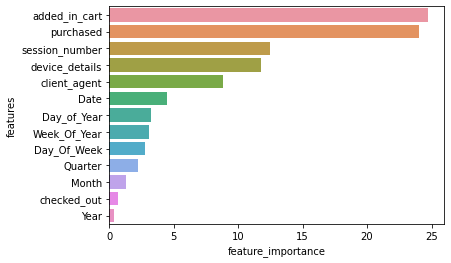

In [84]:
plot_features(X_train.columns, cbr_best.get_feature_importance())

In [104]:
X_train

,session_id,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,Year,Month,Date,Day_of_Year,Week_Of_Year,Quarter,Day_Of_Week
935,2960,341,570,17,0,1,0,2019,8,1,213,31,3,3
508,5164,11,345,6,0,0,0,2019,10,13,286,41,4,6
994,586,847,589,17,0,0,0,2019,8,15,227,33,3,3
2554,485,440,357,9,0,1,0,2019,7,15,196,29,3,0
3279,3491,1320,432,16,0,0,0,2020,2,5,36,6,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,931,110,469,1,0,0,0,2019,9,27,270,39,3,4
4590,1754,209,189,7,0,0,0,2019,8,13,225,33,3,1
3669,3649,792,523,1,0,0,0,2020,1,24,24,4,1,4
1397,274,1518,105,10,1,0,0,2020,2,11,42,7,1,1


### Predicting with SVR(Support Vector Regression) RBF Kernel

It is of no use as it is only predicting the mean

In [45]:
rbf_svc_predict = rbf_svc.predict(df_final)
rbf_svc_predict[:10]

array([4.91232195, 4.91232195, 4.91232195, 4.91232195, 4.91232195,
       4.91232195, 4.91232195, 4.91232195, 4.91232195, 4.91232195])

### Predicticing with XgBoost....

In [59]:
xgb_tuned_pred = xgb_tuned.predict(df_final)
xgb_tuned_pred[:10]

array([6.493592 , 4.2300715, 5.7180085, 4.4896064, 4.6700377, 6.603825 ,
       5.99233  , 3.9403822, 4.796266 , 6.750694 ], dtype=float32)

In [60]:
xgb_pred = pd.DataFrame()
xgb_pred["time_spent"] = xgb_tuned_pred
xgb_pred["time_spent"] = np.exp(xgb_pred["time_spent"])
xgb_pred.head()

,time_spent
0,660.892883
1,68.722145
2,304.298309
3,89.086372
4,106.701767


In [61]:
xgb_pred.to_csv("Predictions\predictions_xgb_tuned.csv",
                index=False)

In [3]:
!pip install xgboost

In [1]:
!pip install emoji

  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49720 sha256=89cc5582ad3fb5629f3402b1774ab810dda5723aa74a7362590f8eae5365c14b
  Stored in directory: c:\users\arnab aline\appdata\local\pip\cache\wheels\43\3d\82\e7baffa5e86346c6178d7750dba6e8ef063282a37fc563f8f8
Successfully built emoji


In [ ]:
#np.log(33.317), np.exp(3.506068)